In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
from tqdm import tqdm

# init

In [25]:
cap = cv2.VideoCapture('../RES/test1.mp4')
w, h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('w,h', w,h)

cap_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('cap_len', cap_len)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (w,h))

for i in tqdm(range(cap_len)):
    ret, img = cap.read()
    out.write(img)
    
#     cv2.imshow("camera", img)
#     if cv2.waitKey(10) == 27:
#         break
out.release()
cap.release()
cv2.destroyAllWindows()

  1%|          | 47/6046 [00:00<00:13, 460.77it/s]

w,h 848 480
cap_len 6046


100%|██████████| 6046/6046 [00:12<00:00, 467.51it/s]


# make screencast

In [83]:
cap = cv2.VideoCapture(0)
w, h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('w,h', w,h)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('screen.mp4', fourcc, 20.0, (w,h))

while True:
    ret, img = cap.read()
    out.write(img)
    
    cv2.imshow("camera", img)
    if cv2.waitKey(10) == 27:
        break
out.release()
cap.release()
cv2.destroyAllWindows()

w,h 640 480


# resize

In [157]:
cap = cv2.VideoCapture('../RES/hand.mp4')
w, h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('w,h', w,h)

ww, hh = w//3, h//3

cap_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('cap_len', cap_len)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('../RES/hand_res.mp4', fourcc, 20.0, (ww,hh))

for i in tqdm(range(cap_len)):
    ret, img = cap.read()
    img_res = cv2.resize(img, (ww,hh))
    
    out.write(img_res)
out.release()
cap.release()

  3%|▎         | 23/689 [00:00<00:02, 223.29it/s]

w,h 1080 1920
cap_len 689


100%|██████████| 689/689 [00:02<00:00, 249.20it/s]


# library default subtractors

In [150]:
cap = cv2.VideoCapture('../RES/hand.mp4')
cap_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

ret, img = cap.read()
h,w,d = img.shape
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('mog2.mp4', fourcc, 20.0, (w*2,h))

fgbg = cv2.createBackgroundSubtractorMOG2()

for i in tqdm(range(cap_len)):
    ret, img = cap.read()
    
    fgmask = fgbg.apply(img)
    fgmask = np.dstack([fgmask,fgmask,fgmask])
    
    out.write(np.hstack([img, fgmask]))
    
out.release()
cap.release()

100%|██████████| 689/689 [00:34<00:00, 19.80it/s]


# get mean image

100%|██████████| 344/344 [00:00<00:00, 610.14it/s]


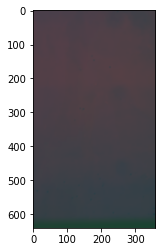

In [194]:
cap = cv2.VideoCapture('../RES/hand_res.mp4')
cap_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

ret, img = cap.read()
h,w,d = img.shape
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

sum_img = np.zeros((h,w,d), dtype=np.float64)

for i in tqdm(range(cap_len//2)):
    ret, img = cap.read()
    img = cv2.blur(img, ksize=(5,5))
    
#     hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    sum_img += lab

out.release()
cap.release()

sum_img /= cap_len
mean_img = sum_img.astype(np.uint8)

plt.imshow(mean_img)

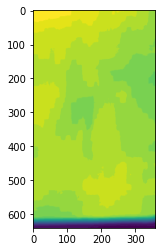

In [195]:
plt.imshow(mean_img[:,:,2])

In [183]:
def cosine_dist(img1, img2):
    img1 = img1.astype(np.float)
    img2 = img2.astype(np.float)
    r,g,b = img1[:,:,0], img1[:,:,1], img1[:,:,2]
    rr,gg,bb = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    dot = r*rr + g*gg + b*bb
    
    len1 = (r**2 + g**2 + b**2)**0.5
    len2 = (rr**2 + gg**2 + bb**2)**0.5
    
    cos = dot / (len1 * len2 + 1e-6)
    
    return cos

# cd = cosine_dist(
#     mean_img,
#     mean_img*mean_img/255
# )
cd = cosine_dist(
    np.array([[[1,0,0]]], dtype=np.float),
    np.array([[[1,0,1]]], dtype=np.float),
)

In [199]:
cap = cv2.VideoCapture('../RES/hand_res.mp4')
cap_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

ret, img = cap.read()
h,w,d = img.shape
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)


fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('diff.mp4', fourcc, 20.0, (w*3,h))

stride = 5
for i in tqdm(range(0, cap_len-stride, stride)):
    for j in range(stride):
        ret, img = cap.read()
    img = cv2.blur(img, ksize=(5,5))
#     hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    cd = cosine_dist(img, mean_img)
    
    cd_img = (cd * 255).astype(np.uint8)
    cd_img = np.dstack([cd_img,cd_img,cd_img])
    
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    h1 = hsv[:,:,0].astype(np.int)
    h2 = mean_img[:,:,0].astype(np.int)
    
    diff1 = (h1 - h2) % 180
    diff2 = (h2 - h1) % 180
    diff_h = np.minimum.reduce([diff1, diff2])
    
    diff_h_img = np.dstack([diff_h,diff_h,diff_h])
    diff_h_img = diff_h_img.astype(np.uint8)

    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    s1 = hsv[:,:,1].astype(np.int)
    s2 = mean_img[:,:,1].astype(np.int)
    
    diff_s = cv2.absdiff(s1, s2)
    
    diff_s_img = np.dstack([diff_s,diff_s,diff_s])
    diff_s_img = diff_s_img.astype(np.uint8)\
    
    
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    a1 = lab[:,:,1].astype(np.int)
    a2 = mean_img[:,:,1].astype(np.int)
    
    diff_a = cv2.absdiff(a1, a2)
    
    diff_a_img = np.dstack([diff_a,diff_a,diff_a])
    diff_a_img = diff_a_img.astype(np.uint8)
    
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    b1 = lab[:,:,2].astype(np.int)
    b2 = mean_img[:,:,2].astype(np.int)
    
    diff_b = cv2.absdiff(b1, b2)
    
    diff_b_img = np.dstack([diff_b,diff_b,diff_b])
    diff_b_img = diff_b_img.astype(np.uint8)
    
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     mask = (diff_s > 30) * (diff_h > 10)
#     mask = (diff_h > 20)
#     mask = (diff_a > 60) * (diff_b > 70)
    mask = (cd < 0.85)
    
    
    masked = np.zeros_like(img)
    masked[mask] = 255
    
    out.write(np.hstack([img, masked, cd_img]))
    
out.release()
cap.release()

100%|██████████| 137/137 [00:03<00:00, 42.28it/s]
